In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))

In [2]:

from src.pipeline.modules.clip import ClipFast
from src.pipeline.modules.helper.vision import rotation_image_proper
from src.pipeline.modules.cloth_categories import ClothingCategories
from src.pipeline.modules.cloth_matrix import ClothingSimilarity



from config.path import get_training_data_path
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [3]:
clip_instance = ClipFast(model_name='ViT-L/14')

In [4]:
class_name = 'pant'
relative_path = get_training_data_path('production', class_name)
fullpath = os.path.join(relative_path, 'frame2375_pant_short_.jpg')

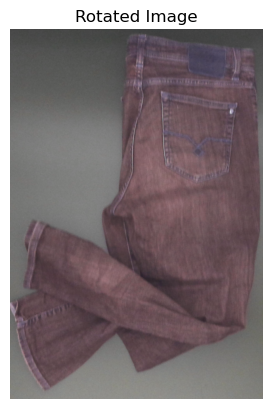

{'jeans': 0.401611328125, 'trouser': 0.02374267578125, 'pant': 0.03912353515625, 'hot pant': 0.0011281967163085938, 'bermuda short': 0.469482421875, 'training short': 0.06451416015625, 'skirt': 0.000576019287109375}


In [5]:
image = cv2.imread(fullpath)

rot_accuracy = []


rot_frame_rgb = image

# Display the rotated image using Matplotlib
plt.imshow(rot_frame_rgb)
plt.title('Rotated Image')
plt.axis('off')  # Hide axis
plt.show()

clip_instance.image = rot_frame_rgb
res, averages = clip_instance.clip_decision_tree(rot_frame_rgb, False)
print(res)

In [6]:

    underwear_matrix = np.array([
        [1.0, 0.7, 0.2],  # Pant
        [0.7, 1.0, 0.7],  # Short
        [0.2, 0.7, 1.0]   # Skirt
    ])

ClothingSimilarity.get_weighted_accuracy(1, clip_instance.classes, res, underwear_matrix)

ValueError: too many values to unpack (expected 2)